In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
from  tensorflow import keras 
sys.path.append("..") # Adds higher directory to python modules path.
import brevis
from brevis import branches
from brevis import evaluate

In [16]:
train_ds, test_ds, validation_ds = brevis.dataset.prepare.dataset(tf.keras.datasets.cifar10.load_data(),32,5000,shuffle_size=15000,input_size =(224,224),include_targets=False,num_outputs = 10)

augment Dataset
targetsis : False
trainSize 45000
testSize 10000


In [62]:

train_ds100, test_ds100, validation_ds100 = brevis.dataset.prepare.dataset(tf.keras.datasets.cifar100.load_data(),32,5000,shuffle_size=15000,input_size =(227,227),include_targets=False,num_outputs = 100)

augment Dataset
targetsis : False
trainSize 45000
testSize 10000


In [18]:
inputs = keras.Input(shape=(224,224,3))
x = keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3))(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(x)
x = keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(x)
x = keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(4096, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)

# ### first branch
# branchLayer = keras.layers.Flatten(name=tf.compat.v1.get_default_graph().unique_name("branch_flatten"))(x)
# branchLayer = keras.layers.Dense(124, activation="relu",name=tf.compat.v1.get_default_graph().unique_name("branch124"))(branchLayer)
# branchLayer = keras.layers.Dense(64, activation="relu",name=tf.compat.v1.get_default_graph().unique_name("branch64"))(branchLayer)
# branchLayer = keras.layers.Dense(10, name=tf.compat.v1.get_default_graph().unique_name("branch_output"))(branchLayer)

x = keras.layers.Dense(4096, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)

# ### second Branch
# branchLayer2 = keras.layers.Flatten(name=tf.compat.v1.get_default_graph().unique_name("branch_flatten"))(x)
# branchLayer2 = keras.layers.Dense(10, name=tf.compat.v1.get_default_graph().unique_name("branch_output"))(branchLayer2)

x = keras.layers.Dense(10, activation='softmax')(x)

# model = keras.Model(inputs=inputs, outputs=[x,branchLayer,branchLayer2], name="alexnet")
model = keras.Model(inputs=inputs, outputs=[x], name="alexnet")
model.save("models/alexNetv6.hdf5")


checkpoint = keras.callbacks.ModelCheckpoint("models/alexNetv6_adam.hdf5", monitor='val_loss',verbose=1,save_best_only=True, mode='auto',period=1)
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
model.summary()



model.fit(train_ds,
      epochs=20,
      validation_data=validation_ds,
      validation_freq=1,
      callbacks=[])

Model: "alexnet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization_15 (Bat  (None, 54, 54, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_16 (Bat  (None, 26, 26, 256)      1024

In [20]:

model.fit(train_ds,
      epochs=5,
      validation_data=validation_ds,
      validation_freq=1,
      callbacks=[])

Epoch 1/5
1407/1407 [==============================] - 125s 86ms/step - loss: 0.3020 - accuracy: 0.9084 - val_loss: 0.8228 - val_accuracy: 0.7588
Epoch 2/5
1407/1407 [==============================] - 121s 83ms/step - loss: 0.2927 - accuracy: 0.9109 - val_loss: 0.7528 - val_accuracy: 0.7814
Epoch 3/5
1407/1407 [==============================] - 123s 85ms/step - loss: 0.2796 - accuracy: 0.9156 - val_loss: 0.7752 - val_accuracy: 0.7692
Epoch 4/5
1407/1407 [==============================] - 123s 84ms/step - loss: 0.2685 - accuracy: 0.9209 - val_loss: 0.8650 - val_accuracy: 0.7582
Epoch 5/5
  96/1407 [=>............................] - ETA: 1:51 - loss: 0.3168 - accuracy: 0.9046

KeyboardInterrupt: 

In [21]:
model.evaluate(test_ds)

313/313 [==============================] - 16s 52ms/step - loss: 0.7665 - accuracy: 0.7799


[0.7664961814880371, 0.7799000144004822]

In [23]:
model.save("./models/alexNetv6_adam.hdf5")

In [40]:
# import random
# seed = 42
# random.seed(seed)
# tf.random.set_seed(seed)
# np.random.seed(seed)
def KL(alpha,K):
    # print("K:",K)
    beta=tf.constant(np.ones((1,K)),dtype=tf.float32)
    S_alpha = tf.reduce_sum(alpha,axis=1,keepdims=True)
    S_beta = tf.reduce_sum(beta,axis=1,keepdims=True)
    lnB = tf.compat.v1.lgamma(S_alpha) - tf.reduce_sum(tf.compat.v1.lgamma(alpha),axis=1,keepdims=True)
    lnB_uni = tf.reduce_sum(tf.compat.v1.lgamma(beta),axis=1,keepdims=True) - tf.compat.v1.lgamma(S_beta)
    
    dg0 = tf.compat.v1.digamma(S_alpha)
    dg1 = tf.compat.v1.digamma(alpha)
    # tf.print("alpha",alpha.shape)
    # tf.print("beta",beta.shape)
    kl = tf.reduce_sum((alpha - beta)*(dg1-dg0),axis=1,keepdims=True) + lnB + lnB_uni
    # print("kl", kl)
    return kl

class lambda_update(tf.keras.callbacks.Callback):
    def __init__(self, annealing_max,  lambda_t=0, multiplier=1, max_t=1):
        self.lambda_t = tf.Variable(initial_value=lambda_t, dtype=tf.float32)
        self.max_t = tf.Variable(initial_value=max_t, dtype=tf.float32)
        self.multiplier = tf.Variable(initial_value=multiplier, dtype=tf.float32)
        self.annealing_max = tf.Variable(initial_value=annealing_max, dtype=tf.float32)

    def on_epoch_begin(self, epoch, logs={}): #needs to be on begin, otherwise the epoch update won't increase the value from 0 to 0.1 till the 3rd epoch...
        val = tf.reduce_min([self.max_t, tf.cast(epoch*self.multiplier, tf.dtypes.float32) / tf.cast(self.annealing_max, tf.dtypes.float32)])
        tf.print("annealing coef updated to:", val)
        self.lambda_t.assign(val)


def exp_evidence(logits): 
    return tf.exp(tf.clip_by_value(logits/10,-10,10))

def loss_wrapper(lambda_callback: lambda_update):
    def custom_loss_function(p, logits):
    #     squared_difference = tf.square(y_true - y_pred)
    #     return tf.reduce_mean(squared_difference, axis=-1)
    #     alpha = alpha + 1
        evidence = exp_evidence(logits)
        alpha = evidence + 1

        S = tf.reduce_sum(alpha,axis=1,keepdims=True) 
        E = alpha - 1
        m = alpha / S
        A = tf.reduce_sum((p-m)**2, axis=1, keepdims=True) 
        B = tf.reduce_sum(alpha*(S-alpha)/(S*S*(S+1)), axis=1, keepdims=True) 
        # tf.print(annealing_coef)
        # annealing_coef = 
        annealing_coef =  lambda_callback.lambda_t
        alp = E*(1-p) + 1 
        C =   annealing_coef * KL(alp,10)
        return (A + B) + C
    return custom_loss_function


def _branch_flat(prevLayer,targets=None):
    """ Add a new branch to a model connecting at the output of prevLayer. 
        NOTE: use the substring "branch" in all names for branch nodes. this is used as an identifier of the branching layers as opposed to the main branch layers for training
    """ 
    branchLayer = keras.layers.Flatten(name=tf.compat.v1.get_default_graph().unique_name("branch_flatten"))(prevLayer)
    branchLayer = keras.layers.Dense(124, activation="relu",name=tf.compat.v1.get_default_graph().unique_name("branch124"))(branchLayer)
    branchLayer = keras.layers.Dense(64, activation="relu",name=tf.compat.v1.get_default_graph().unique_name("branch64"))(branchLayer)
    # output = branch.CrossEntropyEndpoint(targets.shape[-1], name=tf.compat.v1.get_default_graph().unique_name("branch_softmax"))(branchLayer, targets)
    output = keras.layers.Dense(10,name=tf.compat.v1.get_default_graph().unique_name("branch_exit"))(branchLayer)
    # output = (layers.Softmax(name=tf.compat.v1.get_default_graph().unique_name("branch_softmax"))(branchLayer))
    return output

def _branch_conv2d(prevLayer, targets=None):
        """ Add a new branch to a model connecting at the output of prevLayer. 
            NOTE: use the substring "branch" in all names for branch nodes. this is used as an identifier of the branching layers as opposed to the main branch layers for training
        """ 
        # branchLayer = layers.Reshape(,name=tf.compat.v1.get_default_graph().unique_name("branch_reshape"))(prevLayer)
        print(prevLayer.shape)
        branchLayer = keras.layers.Conv2D(filters=32, kernel_size=(1,1), strides=(1,1), activation='relu',name=tf.compat.v1.get_default_graph().unique_name("branch_conv2d"), input_shape=(prevLayer.shape))(prevLayer)
        branchLayer = keras.layers.BatchNormalization(name=tf.compat.v1.get_default_graph().unique_name("branch_batchnorm"))(branchLayer)
        branchLayer = keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2),name=tf.compat.v1.get_default_graph().unique_name("branch_maxpool"))(branchLayer)
        print(branchLayer.shape)
        # branchLayer = keras.layers.Dropout(0.2,name=tf.compat.v1.get_default_graph().unique_name("branch_dropout"))(branchLayer)
        branchLayer = keras.layers.Conv2D(filters=32, kernel_size=(1,1), strides=(1,1), activation='relu',name=tf.compat.v1.get_default_graph().unique_name("branch_conv2d"), input_shape=(branchLayer.shape))(branchLayer)
        branchLayer = keras.layers.BatchNormalization(name=tf.compat.v1.get_default_graph().unique_name("branch_batchnorm"))(branchLayer)
        branchLayer = keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2),name=tf.compat.v1.get_default_graph().unique_name("branch_maxpool"))(branchLayer)
        # branchLayer = keras.layers.Dropout(0.2,name=tf.compat.v1.get_default_graph().unique_name("branch_dropout"))(branchLayer)
        branchLayer = keras.layers.Flatten(name=tf.compat.v1.get_default_graph().unique_name("branch_flatten"))(branchLayer)
        branchLayer = keras.layers.Dense(4096,name=tf.compat.v1.get_default_graph().unique_name("branch_4096"))(branchLayer)
        branchLayer = keras.layers.Dropout(0.2,name=tf.compat.v1.get_default_graph().unique_name("branch_dropout"))(branchLayer)
        # branchLayer = branch.printFeatureSet()(branchLayer, targets,"FS_3")
        
        # branchLayer = layers.LeakyReLU(name=tf.compat.v1.get_default_graph().unique_name("branch_leakyRelu"))(branchLayer)
        output = keras.layers.Dense(10, name=tf.compat.v1.get_default_graph().unique_name("branch_exit"))(branchLayer)
        # output = (layers.Softmax(name=tf.compat.v1.get_default_graph().unique_name("branch_softmax"))(branchLayer))

        return output

In [41]:
lambda_callback = lambda_update(100)
loss = loss_wrapper(lambda_callback)

loss_fn = brevis.utils.evidence_crossentropy(num_outputs=10)
model = brevis.BranchModel(name="../models/alexNetv6_logits.hdf5", custom_objects={})
           
# model.add_targets(10)

# brevis = (branching.core.branched_model(modelName="../models/alexNetv6_logits.hdf5",saveName="models/alexNetv6_entropy_conv2d",transfer=False,customOptions="")
#             .add_branches([branching.branches.branch.branch_conv2d_evidence_1,
#                             branching.branches.branch.branch_conv2d_evidence_1,
#                             branching.branches.branch.newBranch_flatten_evidence],["max_pooling2d","max_pooling2d_1","dense"],target_input=True)
#             .set_dataset(dataset)           
#             )

model.add_branches([_branch_conv2d,_branch_conv2d, _branch_flat],
                          ["max_pooling2d",
                            "max_pooling2d_1",
                            "dense"
                          ],
                          target_input=True,loop=False,num_outputs=10)
            
model.compile(loss=[keras.losses.CategoricalCrossentropy(),loss_wrapper(lambda_callback),loss_wrapper(lambda_callback),loss_wrapper(lambda_callback)], optimizer=tf.optimizers.SGD(learning_rate=0.001, momentum=0.9), preset="")
model.summary()
# loss_fn = brevis.utils.evidence_crossentropy(num_outputs=10)
# model = brevis.BranchModel(name="./models/alexNetv6_evidence_conv2d.hdf5", custom_objects={})
# model = brevis.BranchModel(name="./models/alexNetv6_entropy_conv2d.hdf5", custom_objects={})
           


# model.compile(loss=[loss_fn], optimizer=tf.optimizers.SGD(learning_rate=0.001, momentum=0.9), preset="")
# model.summary()

targets already present?  False
added targets
Matching Branchpoint by id number
Matching Branchpoint by name
add Branch to branch point  max_pooling2d
(None, 27, 27, 96)
(None, 13, 13, 32)
add Branch to branch point  max_pooling2d_1
(None, 13, 13, 256)
(None, 6, 6, 32)
add Branch to branch point  dense
[<KerasTensor: shape=(None, 227, 227, 3) dtype=float32 (created by layer 'input_2')>, <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'targets')>]
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_2')>, <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'branch_exit_15')>, <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'branch_exit_16')>, <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'branch_exit_17')>]
branch added <brevis.core_v2.BranchModel object at 0x0000023F99E92748>

preset: Other
Model: "alexnet"
__________________________________________________________________________________________________
 Layer

In [42]:

lambda_callback = lambda_update(10)
loss = loss_wrapper(lambda_callback)

loss_fn = brevis.utils.evidence_crossentropy(num_outputs=10)
model = brevis.BranchModel(name="./models/alexNetv6_adam.hdf5", custom_objects={})
           
# model.add_targets(10)
model.add_branches([_branch_conv2d,_branch_conv2d, _branch_flat],
                          ["max_pooling2d_9",
                            "max_pooling2d_10",
                            "dense_9"
                          ],
                          target_input=False,loop=False,num_outputs=10)

# [keras.losses.CategoricalCrossentropy(),loss_wrapper(lambda_callback),loss_wrapper(lambda_callback),loss_wrapper(lambda_callback)]
model.compile(loss=[keras.losses.CategoricalCrossentropy(from_logits=False),keras.losses.CategoricalCrossentropy(from_logits=True),keras.losses.CategoricalCrossentropy(from_logits=True),keras.losses.CategoricalCrossentropy(from_logits=True)], optimizer="adam", preset="")
model.summary()

Matching Branchpoint by id number
Matching Branchpoint by name
add Branch to branch point  max_pooling2d_9
(None, 26, 26, 96)
(None, 12, 12, 32)
add Branch to branch point  max_pooling2d_10
(None, 12, 12, 256)
(None, 5, 5, 32)
add Branch to branch point  dense_9
KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_11')>, <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'branch_exit_18')>, <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'branch_exit_19')>, <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'branch_exit_20')>]
branch added <brevis.core_v2.BranchModel object at 0x0000023F99F1C488>

preset: Other
Model: "alexnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Pa

In [43]:
model.evaluate(test_ds)

313/313 [==============================] - 20s 65ms/step - loss: 8.4725 - dense_11_loss: 0.7665 - branch_exit_18_loss: 2.5012 - branch_exit_19_loss: 2.8614 - branch_exit_20_loss: 2.3435 - dense_11_accuracy: 0.7799 - branch_exit_18_accuracy: 0.1094 - branch_exit_19_accuracy: 0.0990 - branch_exit_20_accuracy: 0.0955


[8.47254753112793,
 0.7664953470230103,
 2.501178741455078,
 2.8614115715026855,
 2.34346342086792,
 0.7799000144004822,
 0.10939999669790268,
 0.0989999994635582,
 0.09549999982118607]

In [44]:
lambda_callback = lambda_update(100)
model.fit(train_ds,test_ds,epochs =5,callbacks=[lambda_callback], transfer = True)

Freezing Main Layers and setting branch layers training to true
annealing coef updated to: 0
Epoch 1/5
1407/1407 [==============================] - ETA: 0s - loss: 3.8069 - dense_11_loss: 0.2514 - branch_exit_18_loss: 1.9736 - branch_exit_19_loss: 1.4250 - branch_exit_20_loss: 0.1570 - dense_11_accuracy: 0.9315 - branch_exit_18_accuracy: 0.4914 - branch_exit_19_accuracy: 0.5222 - branch_exit_20_accuracy: 0.9520
Epoch 1: saving model to models\alexnet_branched
INFO:tensorflow:Assets written to: models\alexnet_branched\assets
1407/1407 [==============================] - 182s 119ms/step - loss: 3.8069 - dense_11_loss: 0.2514 - branch_exit_18_loss: 1.9736 - branch_exit_19_loss: 1.4250 - branch_exit_20_loss: 0.1570 - dense_11_accuracy: 0.9315 - branch_exit_18_accuracy: 0.4914 - branch_exit_19_accuracy: 0.5222 - branch_exit_20_accuracy: 0.9520 - val_loss: 4.3090 - val_dense_11_loss: 0.8223 - val_branch_exit_18_loss: 1.3882 - val_branch_exit_19_loss: 1.1456 - val_branch_exit_20_loss: 0.9529 -

In [45]:
model.evaluate(test_ds)

313/313 [==============================] - 13s 40ms/step - loss: 4.7866 - dense_11_loss: 0.8678 - branch_exit_18_loss: 1.5145 - branch_exit_19_loss: 1.0579 - branch_exit_20_loss: 1.3464 - dense_11_accuracy: 0.7927 - branch_exit_18_accuracy: 0.5334 - branch_exit_19_accuracy: 0.6556 - branch_exit_20_accuracy: 0.7839


[4.786564350128174,
 0.8677902221679688,
 1.5144637823104858,
 1.0579063892364502,
 1.3464038372039795,
 0.7926999926567078,
 0.5333999991416931,
 0.6556000113487244,
 0.7839000225067139]

In [58]:
model.save("./models/AN_flat_EDL.hdf5")
model.fit(train_ds,validation_ds,epochs =5,callbacks=[lambda_callback], transfer = False)

Setting Main Layers  and branch layers training to true
setting  input_2  training to true
setting  conv2d_1  training to true
setting  batch_normalization  training to true
setting  max_pooling2d  training to true
setting  conv2d_2  training to true
setting  batch_normalization_1  training to true
setting  max_pooling2d_1  training to true
setting  conv2d_3  training to true
setting  batch_normalization_2  training to true
setting  conv2d_4  training to true
setting  batch_normalization_3  training to true
setting  conv2d_5  training to true
setting  batch_normalization_4  training to true
setting  max_pooling2d_2  training to true
setting  flatten  training to true
setting  dense  training to true
setting  dropout  training to true
setting  branch_flatten_12  training to true
setting  branch_flatten_13  training to true
setting  branch_flatten_14  training to true
setting  dense_1  training to true
setting  branch124_12  training to true
setting  branch124_13  training to true
settin

In [59]:
model.save("./models/AN_flat_EDL_10.hdf5")

In [50]:
model.evaluate(test_ds)

313/313 [==============================] - 13s 42ms/step - loss: 3.2555 - dense_2_loss: 0.8347 - branch_exit_6_loss: 0.9457 - branch_exit_7_loss: 0.8507 - branch_exit_8_loss: 0.6243 - dense_2_accuracy: 0.7294 - branch_exit_6_accuracy: 0.5495 - branch_exit_7_accuracy: 0.6831 - branch_exit_8_accuracy: 0.7482


[3.2554547786712646,
 0.8347243070602417,
 0.9457207918167114,
 0.8507243990898132,
 0.6242857575416565,
 0.7293999791145325,
 0.5494999885559082,
 0.6830999851226807,
 0.748199999332428]

In [6]:
# SVM reliability diagram with calibration
def classification(y, prob, bins =10):
    from sklearn.datasets import make_classification
    from sklearn.svm import SVC
    from sklearn.calibration import CalibratedClassifierCV
    from sklearn.model_selection import train_test_split
    from sklearn.calibration import calibration_curve
    from matplotlib import pyplot
    linspace = np.linspace(0,1,num=bins)
    fop, mpv = calibration_curve(y,prob, n_bins=bins, normalize=True)
    # plot perfectly calibrated
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot calibrated reliability
    pyplot.plot(mpv, fop, marker='.')
    pyplot.show()

import math
    
# SVM reliability diagram with calibration
def cumulativeClassification(y, prob, bins =10, thresholdType = ">="):
    from sklearn.datasets import make_classification
    from sklearn.svm import SVC
    from sklearn.calibration import CalibratedClassifierCV
    from sklearn.model_selection import train_test_split
    from sklearn.calibration import calibration_curve
    from matplotlib import pyplot
    print("max",max(prob))
    # linspace = np.linspace(0,math.ceil(max(prob)),num=bins)
    linspace = np.linspace(0,1,num=bins)
    # pyplot.hist(prob,bins=linspace,density=False)
    accuracy = []
    throughputs = []
    for point in linspace:
        true = 0
        false = 0   
        throughput = 0
        for i, p in enumerate(prob):
            
            if threshold == ">=":
                if p >= point:
                    throughput = throughput + 1
                    if y[i] ==True:
                        true = true +1
                    if y[i] ==False: 
                        false = false + 1
            else:
                if p <= point:
                    throughput = throughput + 1
                    if y[i] ==True:
                        true = true +1
                    if y[i] ==False: 
                        false = false + 1
        try:
            accuracy.append(true/(true+false))
            throughputs.append(throughput/len(prob))
            # print(point, throughput/len(prob))                
        except:
            accuracy.append(0)
            throughputs.append(0)
            pass
    # print(throughputs)
    pyplot.plot(linspace[:len(throughputs)], throughputs,label="Accepted (y) for threshold (x)")
    fop, mpv = calibration_curve(y,prob, n_bins=bins, normalize=True)
    # plot calibrated reliability
    # pyplot.plot(mpv, fop, marker='.',label="calibration")
    # fop, mpv = calibration_curve(y,prob, n_bins=bins, normalize=True)
    # plot perfectly calibrated
    # pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot calibrated reliability
    pyplot.plot(linspace[:len(accuracy)], accuracy, marker='.',color='blue',label="Accuracy")
    pyplot.legend(loc="upper right")
    pyplot.legend(bbox_to_anchor=(1.1, 1.05))
    pyplot.xlabel('Probability/Evidence')
    # pyplot.set_ylabel('Rating')
    pyplot.show()
    

In [7]:
def getPredictions(model):
    stopping_point = None
    num_outputs = len(model.outputs) # the number of output layers for the purpose of providing labels
    #     train_ds, test_ds, validation_ds = (dataset)
    Results=[]
    Pred=[]
    Labels =[]
    
    Outputs = pd.DataFrame()
    pAcc=[]
    for i in range(num_outputs):
        Results.append([])
        Pred.append([])
        Labels.append([])
    for i, (x,y) in enumerate(test_ds):
        if stopping_point and i > stopping_point:
            break
        print("prediction: {} of {}".format(i,len(test_ds)),end='\r')
        predictions = model.predict(x)
        # print("pred", predictions)
        # print(y)
        # if num_outputs > 1:
        for k, outputs in enumerate(predictions):
            # print("output ", k, outputs)
            for j, prediction in enumerate(outputs):
                # print(prediction)
                # for pred
                Results[k].append(np.argmax(prediction))
                Pred[k].append((tf.reduce_sum(tf.nn.softplus(prediction)).numpy()))
                # Pred[k].append((np.amax(tf.nn.softplus(prediction))))
                # Pred[k].append(np.amax(tf.nn.softmax(prediction)))
                Labels[k].append(np.argmax(y[j]))
    Outputs=[]
    for j in range(num_outputs):
        df = pd.DataFrame({"x":Results[j],"y":Labels[j],"probs":Pred[j]})
        conditions = [df['x'] == df['y'],df['x'] != df['y']]
        choices = [1, 0]
        #create new column in DataFrame that displays results of comparisons
        df['testy'] = np.select(conditions, choices, default=None)
        Outputs.append(df)
    return Outputs


In [104]:
import math
from scipy.special import logsumexp
num_classes=10
def exp_evidence(logits): 
    return tf.exp(tf.clip_by_value(logits/10,-10,10))

def calcEntropy_Tensors2(y_hat):
    #entropy is the sum of y * log(y) for all possible labels.
    #doesn't deal with cases of log(0)
    val = y_hat * tf.math.log(y_hat)/tf.math.log(tf.constant(2, dtype=y_hat.dtype))
    sumEntropies =  tf.reduce_sum(tf.boolean_mask(val,tf.math.is_finite(val)))
    return -sumEntropies


def getPredictions_Energy(model, input_set, stopping_point=None):
    # stopping_point = None
    num_outputs = len(model.outputs) # the number of output layers for the purpose of providing labels
    #     train_ds, test_ds, validation_ds = (dataset)
    Results=[]
    Pred=[]
    Labels =[]
    Uncert = []
    Outputs = pd.DataFrame()
    Energy = []
    Energy_softmax = []
    Energy_evidence = []
    Energy_alpha = []
    Energy_Mass = []
    Entropy = []
    pAcc=[]
    pOverlap=[]
    
    calibration=[]
    for i in range(num_outputs):
        Results.append([])
        Pred.append([])
        Labels.append([])
        Energy.append([]) 
        Energy_softmax.append([]) 
        Energy_evidence.append([])
        Energy_alpha.append([])
        Energy_Mass.append([])
        Uncert.append([])
        Entropy.append([])
        calibration.append([])
        pOverlap.append([])

    T = 1 ### temperature variable
    for i, (x,y) in enumerate(input_set):
        if stopping_point and i > stopping_point:
            break
        print("prediction: {} of {}".format(i,len(input_set)),end='\r')
        predictions = np.array(model.predict(x)).squeeze()
        for k, outputs in enumerate(predictions):
            # print("Output!!!")
            for j, prediction in enumerate(outputs):
                # dirch = dirichlet_prior_network_uncertainty([prediction])
                # print(dirch)
                evidence =exp_evidence(prediction)
                # evidence =tf.exp(prediction)
                alpha = evidence +1
                S = sum(alpha)
                E = alpha - 1
                Mass = alpha / S
                u = num_classes / S
                Uncert[k].append(u.numpy().mean())
                # print("uncert",u.numpy().mean())
                Results[k].append(np.argmax(prediction))
                Labels[k].append(np.argmax(y[j]))
                #overlap
                # print(Results[0][j],Results[k][j])
                if Results[0][j] == Results[k][j] :
                    # print("true")
                    pOverlap[k].append(1)
                else: 
                    pOverlap[k].append(0)
                # Energy.append(prediction.mean() -(logsumexp(prediction)))
                # print("Energy", -(1 * logsumexp(np.array(prediction)/1)))
                Energy[k].append( -(logsumexp(np.array(prediction))))
                Energy_softmax[k].append( -(1 * logsumexp(np.array(tf.nn.softmax(prediction))/1)))
                Energy_evidence[k].append( -(1 * np.log(np.sum((np.array(evidence)/1)))))
                Energy_alpha[k].append( -(1 * np.log(np.sum((np.array(alpha)/1)))))
                Energy_Mass[k].append( -(1 * np.log(np.sum((np.array(Mass)/1)))))
                # print("Entropy",calcEntropy_Tensors2(tf.nn.softmax(prediction)).numpy())
                Entropy[k].append(calcEntropy_Tensors2(tf.nn.softmax(prediction)).numpy())
                # print("calibration",np.amax(tf.nn.softmax(prediction).numpy()))
                calibration[k].append(((tf.reduce_sum(tf.nn.softplus(prediction)).numpy())))
    print("")
    _uncert = np.array(Uncert)
    # print(_uncert)
    # print("")
    # print("avg entropy",_uncert.mean())
    # print("avg energy",np.array(Energy).mean())
    Outputs=[]
    for j in range(num_outputs):
        # df = pd.DataFrame({"x":Results[j],"y":Labels[j],"probs":Pred[j]})
        # conditions = [df['x'] == df['y'],df['x'] != df['y']]
        # choices = [1, 0]
        
        # df = pd.DataFrame({"x":Results[j],"y":Labels[j],"uncert":Uncert[j],"energy":Energy[j],"Energy_softmax":Energy_softmax[j],"Energy_evidence":Energy_evidence[j],"Energy_alpha":Energy_alpha[j],"Energy_Mass":Energy_Mass[j],'entropy':Entropy[j],'calibration':calibration[j]})
        df = pd.DataFrame({"x":Results[j],"y":Labels[j],"uncert":Uncert[j],"energy":Energy[j],"Energy_softmax":Energy_softmax[j],"Energy_evidence":Energy_evidence[j],"Energy_alpha":Energy_alpha[j],"Energy_Mass":Energy_Mass[j],'entropy':Entropy[j],'calibration':calibration[j],'overlap':pOverlap[j]})
        conditions = [df['x'] == df['y'],df['x'] != df['y']]
        choices = [1, 0]
        df['correct'] = np.select(conditions, choices, default=None)
        Outputs.append(df)
    return Outputs

In [105]:
outputs = getPredictions_Energy(model,test_ds)
for i, output in enumerate(outputs):
    print(model.outputs[i].name)
    display(output)

prediction: 312 of 313
dense_2/Softmax:0


,x,y,uncert,energy,Energy_softmax,Energy_evidence,Energy_alpha,Energy_Mass,entropy,calibration,overlap,correct
0,3,3,0.497387,-2.459649,-2.403560,-2.313037,-3.000972,5.960465e-08,3.218952,7.549220,1,1
1,8,8,0.497384,-2.461150,-2.403591,-2.313047,-3.000977,-0.000000e+00,3.216028,7.551586,1,1
2,8,8,0.497385,-2.461001,-2.403588,-2.313046,-3.000977,-0.000000e+00,3.216317,7.551353,1,1
3,0,0,0.497385,-2.461045,-2.403589,-2.313046,-3.000977,5.960465e-08,3.216233,7.551421,1,1
4,6,6,0.497385,-2.460676,-2.403581,-2.313044,-3.000975,-0.000000e+00,3.216950,7.550840,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8,8,0.497384,-2.461150,-2.403591,-2.313047,-3.000977,5.960465e-08,3.216028,7.551586,1,1
9996,6,3,0.497453,-2.423212,-2.402847,-2.312772,-3.000839,1.192093e-07,3.288921,7.489355,1,0
9997,5,5,0.497384,-2.461150,-2.403591,-2.313047,-3.000977,5.960465e-08,3.216029,7.551586,1,1
9998,1,1,0.497449,-2.424744,-2.402856,-2.312788,-3.000847,5.960465e-08,3.287039,7.493577,1,1


branch_exit_9/BiasAdd:0


,x,y,uncert,energy,Energy_softmax,Energy_evidence,Energy_alpha,Energy_Mass,entropy,calibration,overlap,correct
0,3,3,0.897380,3.307343,-2.460917,-0.134141,-2.410861,-0.000000e+00,1.707197e-02,3.596104e-02,1,1
1,8,8,0.601410,-18.651197,-2.461150,-1.891242,-2.811064,-0.000000e+00,1.222661e-16,1.865120e+01,1,1
2,0,8,0.981512,23.022493,-2.461140,1.669405,-2.321246,-0.000000e+00,1.061749e-03,1.003363e-10,0,0
3,0,0,0.928511,5.582820,-2.461150,0.261450,-2.376758,-0.000000e+00,1.097421e-06,3.754884e-03,1,1
4,4,6,0.392083,-27.367390,-2.461150,-2.741151,-3.238868,-0.000000e+00,3.909165e-25,2.736739e+01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,8,0.725927,-12.508106,-2.461150,-1.328528,-2.622890,-0.000000e+00,3.084630e-10,1.250811e+01,1,0
9996,6,3,0.952973,17.799971,-2.423175,0.706283,-2.350754,5.960465e-08,1.190243e+00,1.860249e-08,0,0
9997,5,5,0.919430,3.838911,-2.461150,0.132041,-2.386587,5.960465e-08,6.782304e-07,2.128881e-02,1,1
9998,1,1,0.670317,-14.677588,-2.461150,-1.592965,-2.702590,-0.000000e+00,3.812761e-08,1.468064e+01,1,1


branch_exit_10/BiasAdd:0


,x,y,uncert,energy,Energy_softmax,Energy_evidence,Energy_alpha,Energy_Mass,entropy,calibration,overlap,correct
0,3,3,0.198373,-36.946354,-2.461150,-3.699078,-3.920190,-0.000000e+00,1.725812e-24,36.946354,1,1
1,8,8,0.531687,-21.662111,-2.461150,-2.175667,-2.934285,1.192093e-07,2.040731e-19,21.662111,1,1
2,8,8,0.883183,1.007798,-2.461146,-0.279665,-2.426808,-0.000000e+00,4.646239e-04,0.311173,1,1
3,0,0,0.910322,3.107139,-2.461150,0.014986,-2.396542,5.960465e-08,7.954834e-06,0.043757,1,1
4,6,6,0.665661,-15.022279,-2.461150,-1.613960,-2.709560,-0.000000e+00,3.834769e-10,15.022314,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,8,0.846503,-2.160009,-2.461149,-0.595153,-2.469227,5.960465e-08,9.529291e-05,2.269192,1,0
9996,5,3,0.648712,-15.910078,-2.461150,-1.689201,-2.735351,-1.192093e-07,3.764346e-11,15.910086,0,0
9997,2,5,0.549794,-19.372866,-2.461150,-2.102745,-2.900796,1.192093e-07,2.454331e-07,20.591433,1,0
9998,4,1,0.300249,-30.403776,-2.461150,-3.148698,-3.505728,-0.000000e+00,1.194719e-08,39.121769,1,0


branch_exit_11/BiasAdd:0


,x,y,uncert,energy,Energy_softmax,Energy_evidence,Energy_alpha,Energy_Mass,entropy,calibration,overlap,correct
0,5,3,0.820421,-6.709052,-2.461150,-0.783383,-2.500523,-0.000000e+00,8.706670e-10,6.710271,0,0
1,8,8,0.000454,-119.839363,-2.461150,-10.000000,-10.000454,-0.000000e+00,-0.000000e+00,119.839363,1,1
2,8,8,0.350665,-29.083960,-2.461150,-2.918702,-3.350509,1.192093e-07,1.541367e-23,29.083960,1,1
3,0,0,0.252932,-33.779842,-2.461150,-3.385623,-3.677222,5.960465e-08,1.348184e-25,33.779842,1,1
4,6,6,0.035245,-56.089504,-2.461150,-5.612145,-5.648026,5.960465e-08,4.697008e-24,56.210026,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8,8,0.028261,-58.397316,-2.461150,-5.840196,-5.868864,1.192093e-07,3.060544e-36,58.397316,1,1
9996,6,3,0.780656,-6.094575,-2.461142,-1.033091,-2.550206,-1.192093e-07,8.456281e-04,6.120506,1,0
9997,5,5,0.020315,-61.780365,-2.461150,-6.178463,-6.198987,-0.000000e+00,6.295266e-35,61.780365,1,1
9998,1,1,0.420718,-21.038319,-2.460358,-2.622410,-3.168376,-0.000000e+00,4.869302e-02,36.862309,1,1


In [106]:
outputs_OOD = getPredictions_Energy(model,test_ds100)
for i, output in enumerate(outputs):
    print(model.outputs[i].name)
    display(output)

prediction: 312 of 313
dense_2/Softmax:0


,x,y,uncert,energy,Energy_softmax,Energy_evidence,Energy_alpha,Energy_Mass,entropy,calibration,overlap,correct
0,3,3,0.497387,-2.459649,-2.403560,-2.313037,-3.000972,5.960465e-08,3.218952,7.549220,1,1
1,8,8,0.497384,-2.461150,-2.403591,-2.313047,-3.000977,-0.000000e+00,3.216028,7.551586,1,1
2,8,8,0.497385,-2.461001,-2.403588,-2.313046,-3.000977,-0.000000e+00,3.216317,7.551353,1,1
3,0,0,0.497385,-2.461045,-2.403589,-2.313046,-3.000977,5.960465e-08,3.216233,7.551421,1,1
4,6,6,0.497385,-2.460676,-2.403581,-2.313044,-3.000975,-0.000000e+00,3.216950,7.550840,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8,8,0.497384,-2.461150,-2.403591,-2.313047,-3.000977,5.960465e-08,3.216028,7.551586,1,1
9996,6,3,0.497453,-2.423212,-2.402847,-2.312772,-3.000839,1.192093e-07,3.288921,7.489355,1,0
9997,5,5,0.497384,-2.461150,-2.403591,-2.313047,-3.000977,5.960465e-08,3.216029,7.551586,1,1
9998,1,1,0.497449,-2.424744,-2.402856,-2.312788,-3.000847,5.960465e-08,3.287039,7.493577,1,1


branch_exit_9/BiasAdd:0


,x,y,uncert,energy,Energy_softmax,Energy_evidence,Energy_alpha,Energy_Mass,entropy,calibration,overlap,correct
0,3,3,0.897380,3.307343,-2.460917,-0.134141,-2.410861,-0.000000e+00,1.707197e-02,3.596104e-02,1,1
1,8,8,0.601410,-18.651197,-2.461150,-1.891242,-2.811064,-0.000000e+00,1.222661e-16,1.865120e+01,1,1
2,0,8,0.981512,23.022493,-2.461140,1.669405,-2.321246,-0.000000e+00,1.061749e-03,1.003363e-10,0,0
3,0,0,0.928511,5.582820,-2.461150,0.261450,-2.376758,-0.000000e+00,1.097421e-06,3.754884e-03,1,1
4,4,6,0.392083,-27.367390,-2.461150,-2.741151,-3.238868,-0.000000e+00,3.909165e-25,2.736739e+01,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,8,0.725927,-12.508106,-2.461150,-1.328528,-2.622890,-0.000000e+00,3.084630e-10,1.250811e+01,1,0
9996,6,3,0.952973,17.799971,-2.423175,0.706283,-2.350754,5.960465e-08,1.190243e+00,1.860249e-08,0,0
9997,5,5,0.919430,3.838911,-2.461150,0.132041,-2.386587,5.960465e-08,6.782304e-07,2.128881e-02,1,1
9998,1,1,0.670317,-14.677588,-2.461150,-1.592965,-2.702590,-0.000000e+00,3.812761e-08,1.468064e+01,1,1


branch_exit_10/BiasAdd:0


,x,y,uncert,energy,Energy_softmax,Energy_evidence,Energy_alpha,Energy_Mass,entropy,calibration,overlap,correct
0,3,3,0.198373,-36.946354,-2.461150,-3.699078,-3.920190,-0.000000e+00,1.725812e-24,36.946354,1,1
1,8,8,0.531687,-21.662111,-2.461150,-2.175667,-2.934285,1.192093e-07,2.040731e-19,21.662111,1,1
2,8,8,0.883183,1.007798,-2.461146,-0.279665,-2.426808,-0.000000e+00,4.646239e-04,0.311173,1,1
3,0,0,0.910322,3.107139,-2.461150,0.014986,-2.396542,5.960465e-08,7.954834e-06,0.043757,1,1
4,6,6,0.665661,-15.022279,-2.461150,-1.613960,-2.709560,-0.000000e+00,3.834769e-10,15.022314,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,8,0.846503,-2.160009,-2.461149,-0.595153,-2.469227,5.960465e-08,9.529291e-05,2.269192,1,0
9996,5,3,0.648712,-15.910078,-2.461150,-1.689201,-2.735351,-1.192093e-07,3.764346e-11,15.910086,0,0
9997,2,5,0.549794,-19.372866,-2.461150,-2.102745,-2.900796,1.192093e-07,2.454331e-07,20.591433,1,0
9998,4,1,0.300249,-30.403776,-2.461150,-3.148698,-3.505728,-0.000000e+00,1.194719e-08,39.121769,1,0


branch_exit_11/BiasAdd:0


,x,y,uncert,energy,Energy_softmax,Energy_evidence,Energy_alpha,Energy_Mass,entropy,calibration,overlap,correct
0,5,3,0.820421,-6.709052,-2.461150,-0.783383,-2.500523,-0.000000e+00,8.706670e-10,6.710271,0,0
1,8,8,0.000454,-119.839363,-2.461150,-10.000000,-10.000454,-0.000000e+00,-0.000000e+00,119.839363,1,1
2,8,8,0.350665,-29.083960,-2.461150,-2.918702,-3.350509,1.192093e-07,1.541367e-23,29.083960,1,1
3,0,0,0.252932,-33.779842,-2.461150,-3.385623,-3.677222,5.960465e-08,1.348184e-25,33.779842,1,1
4,6,6,0.035245,-56.089504,-2.461150,-5.612145,-5.648026,5.960465e-08,4.697008e-24,56.210026,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8,8,0.028261,-58.397316,-2.461150,-5.840196,-5.868864,1.192093e-07,3.060544e-36,58.397316,1,1
9996,6,3,0.780656,-6.094575,-2.461142,-1.033091,-2.550206,-1.192093e-07,8.456281e-04,6.120506,1,0
9997,5,5,0.020315,-61.780365,-2.461150,-6.178463,-6.198987,-0.000000e+00,6.295266e-35,61.780365,1,1
9998,1,1,0.420718,-21.038319,-2.460358,-2.622410,-3.168376,-0.000000e+00,4.869302e-02,36.862309,1,1


rollover enabled, 2647 predictions provided
rollover enabled, 1827 predictions provided
rollover enabled, 1621 predictions provided


<Figure size 432x288 with 0 Axes>

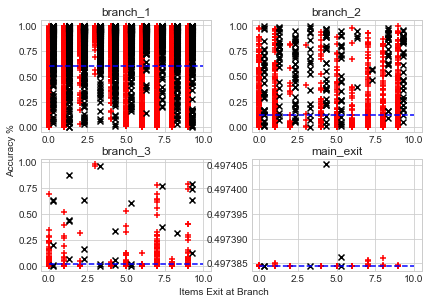

,Branch Name,Predictions,Overall_Accuracy,Accuracy,E_Threshold,acceptance_rate,accepted_correct,accepted_incorrect,accepted_accuracy,overlap_adjusted_accuracy,M(T) B(F),M(F) B(T),M(F) B(F) overlap
0,branch_1,10000,0.5606,0.560600,0.599577,0.735300,3270,4083,0.444716,0.620563,5065,0,1293
1,branch_2,2647,0.7148,0.917265,0.117395,0.309785,624,196,0.760976,0.804878,689,0,36
2,branch_3,1827,0.7771,0.984674,0.016530,0.112753,184,22,0.893204,0.898058,188,0,1
3,main_exit,1621,0.8158,0.996299,0.497384,1.000000,1615,6,0.996299,47.500000,1621,0,0


In [120]:
def displayEvidence_cascade(outputs, thresholds=None, metric ='energy', output_names=["branch_1","branch_2","branch_3","Main_Exit"],Evidence=True):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure()
    series=[]
    fig, axs = plt.subplots(2, 2)
    fig.tight_layout()
    Outputs=pd.DataFrame()
    #lets reorder the predictions so that the final layer is at the end
    _outputs = outputs.copy()
    _outputs.append(_outputs.pop(0))
    rollOver_indices = pd.Index([])
    for i, Predictions in enumerate(_outputs):
        if i == len(_outputs)-1:
            #last exit, accept all
            accept_all = True
        else:
            accept_all = False
        #check if rollover is active, if so, select only the predictions whose indexes match the rollover list
        # print(rollOver_indices)
        # test_acc = Predictions["Acc"].astype('bool').value_counts()
        Predictions["Acc"]=Predictions["correct"].astype('bool')
        Predictions['evidence'] = Predictions[metric]
        # Predictions["evidence"]=Predictions["evidence"].()[0]
        overall_accuracy = (len(Predictions.loc[Predictions['correct'] == True]) /  (len(Predictions)))
        if len(rollOver_indices)>0:
            print("rollover enabled, {} predictions provided".format(len(rollOver_indices)))
            Predictions = Predictions.iloc[rollOver_indices]
        # print(Predictions.shape)
        # Predictions["Acc"]=Predictions["Acc"].astype('bool')
        # Predictions["evidence"]=Predictions["evidence"].()[0]
        Accuracy = len(Predictions.loc[Predictions['correct'] == True]) / (len(Predictions))
        # print(acc)
        # print((acc.loc[True] , acc.loc[False]))
#         _Incorrects_missed = Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["overlap"] == 1)] #all the predictions that the main exit got true and the branch got wrong
#         if len(_Incorrects_missed) > 0 :
#             mean = _Incorrects_missed.groupby("Acc")["evidence"].mean().iloc[0]
#             std = _Incorrects_missed.groupby("Acc")["evidence"].std().iloc[0]
#         else:
#             mean = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].mean().iloc[0]
#             std = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].std().iloc[0]

#         print("mean",mean , " std",std)
        
        correct_rows = Predictions.loc[Predictions['Acc'] == True]
        incorrect_rows = Predictions.loc[Predictions['Acc'] == False]
        
        E_threshold = -1 #-1 is null for threshold
        if thresholds is not None:
            try:
                E_threshold = thresholds[i]
            except:
                print("threshold not supplied for branch {}, using test data".format(i))
                
        # if Evidence:
        if E_threshold ==-1:
            # _correct  = correct_rows.loc[correct_rows[metric] >= correct_rows[metric].mean()]
            # print(correct_rows[metric].std())
            E_threshold = correct_rows[metric].mean()# + _correct[metric].mean()#+ correct_rows[metric].std()
            # mean = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")[metric].mean().iloc[0]
            # std = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")[metric].std().iloc[0]
            # E_threshold = mean # + std
            
        if accept_all == True:
            Accepted = Predictions
            Rejected = None
        else:
            Accepted = Predictions.loc[(Predictions["evidence"] >= E_threshold)]
            Rejected = Predictions.loc[(Predictions["evidence"] < E_threshold)]
            rollOver_indices = Rejected.index
        # else: 
            # if E_threshold ==-1:
            #     E_threshold = mean - (std/2)
            # Accepted = Predictions.loc[(Predictions["evidence"] <= E_threshold)]
            # Rejected = Predictions.loc[(Predictions["evidence"] > E_threshold)]
        
        # rollOver_indices = Rejected.index
        Incorrects_overlap = Accepted.loc[(Accepted['Acc'] == False) & (Accepted["overlap"] == 0)].count().iloc[0]
        if Accepted.shape[0] >0:
            accepted_accuracy = (Accepted.loc[(Accepted['Acc'] == True)].shape[0])/ Accepted.shape[0]
        else:
            accepted_accuracy = 0
        Outputs = Outputs.append(pd.DataFrame({"Branch Name":output_names[i],
                "Predictions": len(Predictions.index),
                "Overall_Accuracy": overall_accuracy,
                "Accuracy":Accuracy,
                "E_Threshold":E_threshold,
                # "Overlap_Threshold":non_overlapping_incorrects_threshold,
                "acceptance_rate":Accepted.shape[0]/(Predictions.shape[0]),
                "accepted_correct":Accepted.loc[(Predictions['Acc'] == True)].shape[0],
                "accepted_incorrect":Accepted.loc[(Predictions['Acc'] == False)].shape[0],
                "accepted_accuracy":accepted_accuracy,
                "overlap_adjusted_accuracy":(Accepted.loc[(Accepted['Acc'] == True)].count()[0] + Incorrects_overlap) / Predictions.loc[(Predictions["evidence"] >E_threshold)].count()[0],
                "M(T) B(F)":Accepted.loc[(Accepted["overlap"] == 1)].count().iloc[0],
                "M(F) B(T)":Accepted.loc[(Accepted["overlap"] ==-1)].count().iloc[0],
                "M(F) B(F) overlap":Incorrects_overlap,
                },index=[i]))
#         print("TT",Accepted.loc[(Accepted["Acc"] ==True) & (Accepted["overlap"] == 0)])
#         print("TF",Accepted.loc[(Accepted["overlap"] == 1)])
#         print("FT",Accepted.loc[(Accepted["overlap"] == -1)])
#         print("FF",Accepted.loc[(Accepted["Acc"] ==False) & (Accepted["overlap"] == 0)])
        axs[round(int(i/2)), round(i%2)]
    # fig, axs = plt.subplots(1, 2)
        # axs[round(int(i/2)), round(i%2)].suptitle('Horizontally stacked subplots')
        axs[round(int(i/2)), round(i%2)].scatter(correct_rows['y'],correct_rows['evidence'],c ='r',marker='+')
        axs[round(int(i/2)), round(i%2)].scatter(incorrect_rows['y']+.3,incorrect_rows['evidence'],c ='k',marker='x')
        axs[round(int(i/2)), round(i%2)].plot(np.repeat(E_threshold,11),'b--')
        axs[round(int(i/2)), round(i%2)].title.set_text(output_names[i])
    
    for ax in fig.axes:
            # ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            axLine, axLabel = ax.get_legend_handles_labels()
            lines=(axLine)
            labels=(axLabel)
    fig.text(0.5, 0.01, 'Items Exit at Branch', ha='center', va='center')
    fig.text(0.01, 0.5, 'Accuracy %', ha='center', va='center', rotation='vertical')
    # fig.legend(lines, labels,bbox_to_anchor=(1., 1), loc=2,borderaxespad=0.,frameon=True)
    # fig.set_size_inches(10, 10)
    plt.show()
    return Outputs
displayEvidence_cascade(outputs, output_names=["branch_1","branch_2","branch_3","main_exit"], metric="uncert", Evidence = True)

rollover enabled, 723 predictions provided
rollover enabled, 163 predictions provided
rollover enabled, 80 predictions provided


<Figure size 432x288 with 0 Axes>

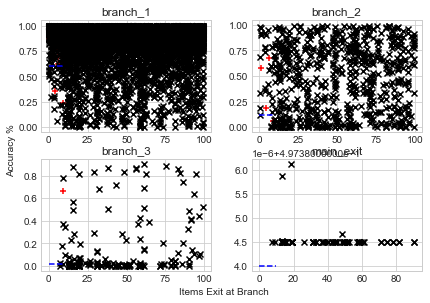

,Branch Name,Predictions,Overall_Accuracy,Accuracy,E_Threshold,acceptance_rate,accepted_correct,accepted_incorrect,accepted_accuracy,overlap_adjusted_accuracy,M(T) B(F),M(F) B(T),M(F) B(F) overlap
0,branch_1,10000,0.0103,0.010300,0.599577,0.927700,99,9178,0.010672,0.597715,3767,0,5446
1,branch_2,723,0.0100,0.005533,0.117395,0.774550,3,557,0.005357,0.514286,274,0,285
2,branch_3,163,0.0114,0.006135,0.016530,0.509202,1,82,0.012048,0.289157,60,0,23
3,main_exit,80,0.0095,0.000000,0.497384,1.000000,0,80,0.000000,0.000000,80,0,0


In [122]:
thresholds = [-16.5083,-24.3825,-31.9859,-2.44904] # energy
thresholds = [0.044399,0.045151,0.041451,3.246300] #entropy
thresholds = [-440.734998 	,-1220.842747,-3785.379170,-3.313527] #energy evidence
thresholds = [0.599577,0.117395,0.016530,0.497384] 
# thresholds = [3.777977,8.117564,8.706334 	,7.506916] 
displayEvidence_cascade(outputs_OOD, output_names=["branch_1","branch_2","branch_3","main_exit"], thresholds=thresholds, Evidence = True, metric = "uncert")

<Figure size 432x288 with 0 Axes>

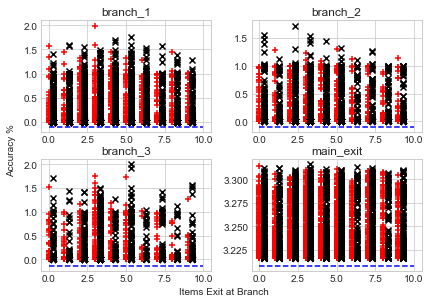

,Branch Name,Predictions,Overall_Accuracy,Accuracy,E_Threshold,acceptance_rate,accepted_correct,accepted_incorrect,accepted_accuracy,overlap_adjusted_accuracy,M(T) B(F),M(F) B(T),M(F) B(F) overlap
0,branch_1,10000,0.5606,0.5606,-0.109887,1.0,5606,4394,0.5606,0.6997,6875,0,1391
1,branch_2,10000,0.7148,0.7148,-0.104397,1.0,7148,2852,0.7148,0.7607,8438,0,459
2,branch_3,10000,0.7771,0.7771,-0.135899,1.0,7771,2229,0.7771,0.7971,9062,0,200
3,main_exit,10000,0.8158,0.8158,3.208066,1.0,8158,1842,0.8158,0.8158,10000,0,0


In [77]:
displayEvidence_cascade(outputs, output_names=["branch_1","branch_2","branch_3","main_exit"], metric='entropy', Evidence = True)

KeyError: 'Column not found: evidence'

<Figure size 432x288 with 0 Axes>

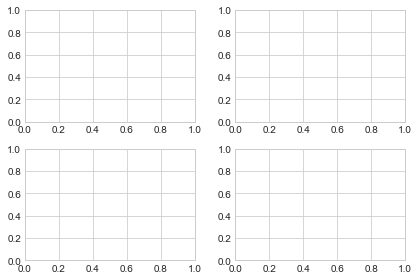

In [41]:
def displayEvidence(branch_predictions, output_names=["branch_1","branch_2","branch_3","main_exit"], Evidence = True, metric = 'energy'):
    rollOver_indices = pd.Index([])
    _predictions = branch_predictions.copy()
        # print(_branch_predictions)
    _predictions.append(_predictions.pop(0))
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure()
    series=[]
    fig, axs = plt.subplots(2, 2)
    fig.tight_layout()
    Outputs=pd.DataFrame()
    _outputs = branch_predictions.copy()
    _outputs.append(_outputs.pop(0))
    rollOver_indices = pd.Index([])
    
    for i, Predictions in enumerate(_predictions):
        if len(rollOver_indices)>0:
            print("rollover enabled, {} predictions provided".format(len(rollOver_indices)))
            Predictions = Predictions.iloc[rollOver_indices]
    # for i, Predictions in enumerate(branch_predictions):
        # Predictions['evidence'] = Predictions[metric]
        Predictions["Acc"]=Predictions["correct"].astype('bool')
        # Predictions["evidence"]=Predictions["evidence"].()[0]
        acc = pd.Series([0,0],[True,False]) ##set defaults 
        acc.update(Predictions["Acc"].value_counts())
        # print((acc.loc[True] , acc.loc[False]))
        mean = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].mean().iloc[0]
        std = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].std().iloc[0]
        
        correct_rows = Predictions.loc[Predictions['Acc'] == True]
        incorrect_rows = Predictions.loc[Predictions['Acc'] == False]
        if Evidence:
            E_threshold = mean + std
            # E_threshold = correct_rows.mean()
            Accepted = Predictions.loc[(Predictions["evidence"] <= E_threshold)]
            Rejected = Predictions.loc[(Predictions["evidence"] > E_threshold)]
        
            rollOver_indices = Rejected.index
            Incorrects_overlap = Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] > E_threshold) & (Predictions["overlap"] == 0)].count().iloc[0]
            Outputs = Outputs.append(pd.DataFrame({"Branch Name":output_names[i],
                    "Accuracy":(acc.loc[True] /  (acc.loc[True] + acc.loc[False])),
                    "E_Threshold":E_threshold,
                    # "Overlap_Threshold":non_overlapping_incorrects_threshold,
                    "acceptance_rate":Predictions.loc[(Predictions["evidence"] > E_threshold)].sort_values("evidence").shape[0]/(Predictions.count().iloc[0]),
                    "accepted_correct":Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] > E_threshold)].sort_values("evidence").shape[0],
                    "accepted_incorrect":Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] > E_threshold)].sort_values("evidence").shape[0],
                    "accepted_accuracy":(Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] > E_threshold)].sort_values("evidence").shape[0])/ Predictions.loc[(Predictions["evidence"] > E_threshold)].count()[0],
                    "overlap_adjusted_accuracy":(Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] > E_threshold)].sort_values("evidence").shape[0] + Incorrects_overlap) / Predictions.loc[(Predictions["evidence"] > E_threshold)].count()[0],
                    "rejected_correct":Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] < E_threshold)].sort_values("evidence").shape[0],
                    "rejected_incorrect":Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] < E_threshold)].sort_values("evidence").shape[0],
                    "Incorrects_overlap":Incorrects_overlap,
                    },index=[i]))
        else:
            print("mean",mean , " std",std)
            E_threshold = mean - std
            Accepted = Predictions.loc[(Predictions["evidence"] <= E_threshold)]
            Rejected = Predictions.loc[(Predictions["evidence"] > E_threshold)]
        
            rollOver_indices = Rejected.index
            Incorrects_overlap = Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] < E_threshold) & (Predictions["overlap"] == 0)].count().iloc[0]
            # if i ==1 or i == 0 :
                # print(Predictions)
                # print(Predictions.loc[ (Predictions['Acc'] == True)  & (Predictions["overlap"] == 0) ])
            # print(Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] < E_threshold) ].count())
            Outputs = Outputs.append(pd.DataFrame({"Branch Name":output_names[i],
                    "Accuracy":(acc.loc[True] /  (acc.loc[True] + acc.loc[False])),
                    "E_Threshold":E_threshold,
                    # "Overlap_Threshold":non_overlapping_incorrects_threshold,
                    "acceptance_rate":Predictions.loc[(Predictions["evidence"] < E_threshold)].sort_values("evidence").shape[0]/(Predictions.count().iloc[0]),
                    "accepted_correct":Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] < E_threshold)].sort_values("evidence").shape[0],
                    "accepted_incorrect":Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] < E_threshold)].sort_values("evidence").shape[0],
                    "accepted_accuracy":(Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] < E_threshold)].sort_values("evidence").shape[0])/ Predictions.loc[(Predictions["evidence"] < E_threshold)].count()[0],
                    "overlap_adjusted_accuracy":(Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] < E_threshold)].sort_values("evidence").shape[0] + Incorrects_overlap) / Predictions.loc[(Predictions["evidence"] < E_threshold)].count()[0],
                    "rejected_correct":Predictions.loc[(Predictions['Acc'] == True)  & (Predictions["evidence"] > E_threshold)].sort_values("evidence").shape[0],
                    "rejected_incorrect":Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["evidence"] > E_threshold)].sort_values("evidence").shape[0],
                    "Incorrects_overlap":Incorrects_overlap,
                    },index=[i]))
        axs[round(int(i/2)), round(i%2)]
    # fig, axs = plt.subplots(1, 2)
        # axs[round(int(i/2)), round(i%2)].suptitle('Horizontally stacked subplots')
        axs[round(int(i/2)), round(i%2)].scatter(correct_rows['y'],correct_rows['evidence'],c ='r',marker='+')
        axs[round(int(i/2)), round(i%2)].scatter(incorrect_rows['y']+.3,incorrect_rows['evidence'],c ='k',marker='x')
        axs[round(int(i/2)), round(i%2)].plot(np.repeat(E_threshold,11),'b--')
        axs[round(int(i/2)), round(i%2)].title.set_text("evidence")
    
    for ax in fig.axes:
            # ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            axLine, axLabel = ax.get_legend_handles_labels()
            lines=(axLine)
            labels=(axLabel)
    fig.text(0.5, 0.01, 'Items Exit at Branch', ha='center', va='center')
    fig.text(0.01, 0.5, 'Accuracy %', ha='center', va='center', rotation='vertical')
    # fig.legend(lines, labels,bbox_to_anchor=(1., 1), loc=2,borderaxespad=0.,frameon=True)
    # fig.set_size_inches(10, 10)
    plt.show()
    return Outputs
    
displayEvidence(outputs, output_names=["main_exit","branch_1","branch_2","branch_3"], Evidence = True)

In [101]:
print(test_ds100)
outputs_OOD = getPredictions_Energy(model,test_ds100,None)
for i, output in enumerate(outputs_OOD):
    print(model.outputs[i].name)
    display(output)

<BatchDataset element_spec=((TensorSpec(shape=(None, 227, 227, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>
prediction: 312 of 313
dense_2/Softmax:0


,x,y,uncert,energy,Energy_softmax,Energy_evidence,Energy_alpha,Energy_Mass,entropy,calibration,overlap,correct
0,2,3,4.973845,-2.461149,-2.403591,-3.313614,-4.313614,-2.402586,3.216031,0.231967,1,0
1,4,8,4.974229,-2.439533,-2.403147,-3.313282,-4.313282,-2.402586,3.258175,0.197990,1,0
2,4,8,4.974409,-2.429840,-2.402966,-3.313128,-4.313128,-2.402586,3.276518,0.178876,1,0
3,9,0,4.973917,-2.457102,-2.403507,-3.313552,-4.313552,-2.402586,3.223897,0.226418,1,0
4,8,6,4.973846,-2.461073,-2.403590,-3.313613,-4.313613,-2.402586,3.216179,0.231865,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,8,4.974401,-2.430536,-2.402987,-3.313135,-4.313135,-2.402586,3.274759,0.182579,1,0
9996,6,3,4.973845,-2.461148,-2.403591,-3.313614,-4.313614,-2.402586,3.216032,0.231966,1,0
9997,4,5,4.973845,-2.461143,-2.403591,-3.313614,-4.313614,-2.402586,3.216043,0.231959,1,0
9998,6,1,4.973845,-2.461150,-2.403591,-3.313614,-4.313614,-2.402586,3.216028,0.231969,1,0


branch_softmax/MatMul:0


,x,y,uncert,energy,Energy_softmax,Energy_evidence,Energy_alpha,Energy_Mass,entropy,calibration,overlap,correct
0,0,3,7.725531,5.799386,-2.452537,-2.604637,-3.604637,-2.402630,0.425503,0.937960,0,0
1,4,8,8.042483,6.097068,-2.457047,-2.554874,-3.554874,-2.402640,0.220254,0.971308,1,0
2,4,8,8.752060,13.994167,-2.430314,-2.446667,-3.446667,-2.402596,1.185672,0.729512,1,0
3,4,0,8.704954,12.642563,-2.454642,-2.453200,-3.453200,-2.402599,0.334242,0.953736,0,0
4,3,6,6.991292,3.914500,-2.417246,-2.740579,-3.740579,-2.402622,1.679925,0.516853,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,8,9.100812,17.289864,-2.424846,-2.402036,-3.402037,-2.402590,1.081593,0.575028,1,0
9996,4,3,8.088433,6.986409,-2.416238,-2.552295,-3.552295,-2.402672,1.673995,0.454758,1,0
9997,4,5,8.351858,9.863930,-2.451368,-2.503034,-3.503034,-2.402606,0.438842,0.928610,1,0
9998,6,1,8.020372,1.575223,-2.459725,-2.587015,-3.587015,-2.402805,0.087979,0.990196,0,0


branch_softmax_1/MatMul:0


,x,y,uncert,energy,Energy_softmax,Energy_evidence,Energy_alpha,Energy_Mass,entropy,calibration,overlap,correct
0,0,3,7.233206,3.542643,-2.451079,-2.694927,-3.694927,-2.402634,0.475445,0.926758,0,0
1,4,8,7.373948,3.265414,-2.434799,-2.679584,-3.679584,-2.402697,1.033719,0.780466,1,0
2,6,8,8.185247,8.724371,-2.452860,-2.528482,-3.528482,-2.402613,0.423267,0.940571,0,0
3,9,0,8.021254,7.831384,-2.447038,-2.553571,-3.553571,-2.402612,0.602724,0.894185,1,0
4,8,6,6.761678,2.840438,-2.426913,-2.789621,-3.789621,-2.402621,1.311152,0.675913,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6,8,8.483771,11.617778,-2.442516,-2.482946,-3.482946,-2.402597,0.700790,0.852181,0,0
9996,2,3,8.146996,6.898220,-2.415833,-2.542839,-3.542839,-2.402669,1.570468,0.423357,1,0
9997,4,5,7.604167,7.903313,-2.428980,-2.619180,-3.619180,-2.402594,1.520250,0.723745,0,0
9998,3,1,8.133362,3.731050,-2.436297,-2.557720,-3.557720,-2.402744,0.761706,0.783497,1,0


branch_softmax_2/MatMul:0


,x,y,uncert,energy,Energy_softmax,Energy_evidence,Energy_alpha,Energy_Mass,entropy,calibration,overlap,correct
0,2,3,7.617009,-3.776679,-2.461150,-2.719617,-3.719617,-2.403037,0.000051,0.999997,1,0
1,4,8,7.484011,2.057757,-2.459479,-2.658201,-3.658201,-2.402685,0.097094,0.988478,1,0
2,4,8,8.064562,10.115605,-2.413643,-2.544860,-3.544860,-2.402600,1.971117,0.432043,1,0
3,9,0,7.796257,8.293133,-2.432839,-2.587672,-3.587672,-2.402600,1.255039,0.763659,1,0
4,8,6,8.003023,0.962534,-2.460527,-2.589085,-3.589085,-2.402792,0.039755,0.995732,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,8,7.464594,6.024144,-2.421481,-2.647794,-3.647794,-2.402616,1.492574,0.592164,1,0
9996,6,3,8.003186,-0.225549,-2.461149,-2.595613,-3.595613,-2.402815,0.000110,0.999995,1,0
9997,4,5,7.772069,1.985010,-2.461111,-2.609875,-3.609875,-2.402696,0.003901,0.999735,1,0
9998,6,1,7.774162,-2.113408,-2.461148,-2.658591,-3.658591,-2.402919,0.000302,0.999983,1,0


model.evaluate(test_ds)

In [63]:
model.evaluate(test_ds)

313/313 [==============================] - 18s 56ms/step - loss: 2.3563 - dense_2_loss: 2.3563 - dense_2_accuracy: 0.8276 - branch_softmax_accuracy: 0.6357 - branch_softmax_1_accuracy: 0.7485 - branch_softmax_2_accuracy: 0.8245 - branch_softmax_evidence: 0.0200 - branch_softmax_mean_ev_succ: 0.3017 - branch_softmax_mean_ev_fail: 0.0252 - branch_softmax_1_evidence: 0.0313 - branch_softmax_1_mean_ev_succ: 0.4090 - branch_softmax_1_mean_ev_fail: 0.0277 - branch_softmax_2_evidence: 0.4529 - branch_softmax_2_mean_ev_succ: 5.3988 - branch_softmax_2_mean_ev_fail: 0.4538


[2.3562586307525635,
 2.3562586307525635,
 0.8276000022888184,
 0.635699987411499,
 0.7484999895095825,
 0.8245000243186951,
 0.02001958340406418,
 0.3017309606075287,
 0.02521381713449955,
 0.031343843787908554,
 0.4089565575122833,
 0.027677344158291817,
 0.4528616666793823,
 5.398817539215088,
 0.45378366112709045]

      x  y         probs testy
9592  1  1  1.266796e+01     1
9554  7  7  1.035892e+01     1
1490  8  8  1.003346e+01     1
1351  7  7  9.699127e+00     1
2819  1  1  9.285329e+00     1
...  .. ..           ...   ...
7453  9  0  3.835026e-09     0
9689  6  9  3.631305e-09     0
1936  7  3  2.722459e-09     0
4364  9  9  2.136407e-09     1
8977  3  0  9.245733e-10     0

[9984 rows x 4 columns]
threshold 0.0247632
max 12.667963981628418


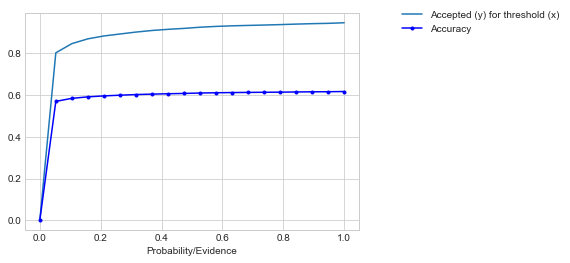

-----------------
      x  y         probs testy
9592  1  1  1.599309e+01     1
9332  9  9  1.240150e+01     1
4278  1  1  1.223094e+01     1
6956  6  6  1.201540e+01     1
7876  1  1  1.171570e+01     1
...  .. ..           ...   ...
4486  8  8  2.445661e-08     1
9292  7  3  1.398935e-08     0
1107  7  7  1.219475e-08     1
6933  0  0  9.812028e-09     1
2892  0  0  4.827367e-09     1

[9984 rows x 4 columns]
rollover enabled, 7454 predictions provided
threshold 0.019689597
max 7.770463943481445


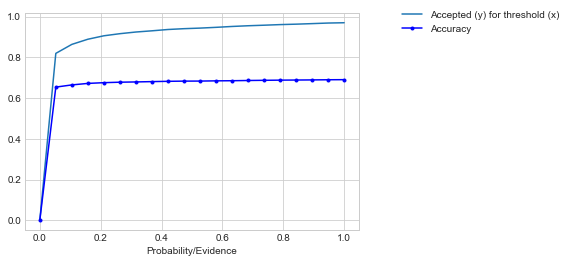

-----------------
      x  y      probs testy
8379  8  8  29.100145     1
8975  8  8  28.888952     1
559   2  2  28.538990     1
2052  8  8  27.878393     1
4455  8  8  27.595686     1
...  .. ..        ...   ...
6500  4  7   0.000008     0
4421  5  2   0.000007     0
6386  5  5   0.000006     1
9794  2  1   0.000006     0
2325  6  7   0.000005     0

[9984 rows x 4 columns]
rollover enabled, 5511 predictions provided
threshold 0.31309432
max 23.523908615112305


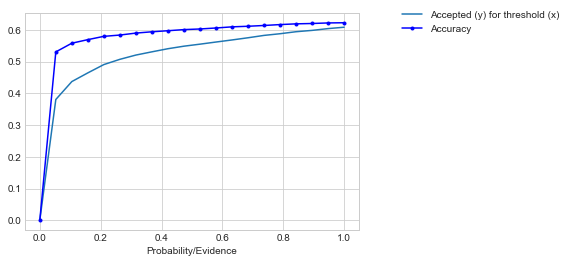

-----------------
      x  y     probs testy
4992  1  1  7.551586     1
3905  2  2  7.551586     1
7560  0  0  7.551586     1
7563  9  9  7.551586     1
3913  7  7  7.551586     1
...  .. ..       ...   ...
5151  1  9  7.461103     0
2325  3  7  7.460432     0
5115  5  5  7.460393     1
3704  7  5  7.459698     0
6543  6  6  7.457842     1

[9984 rows x 4 columns]
rollover enabled, 2866 predictions provided
threshold 0
max 7.551586151123047


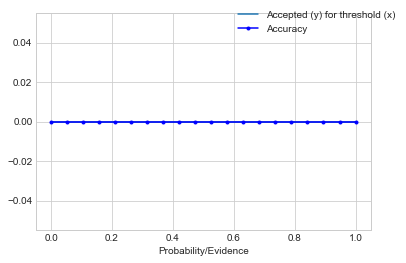

-----------------
thresholds [0.0247632, 0.019689597, 0.31309432, 0]
input_predictions [9984, 7454, 5511, 2866]
Accepted_list [2530, 1943, 2645, 2866]
Acceptance_correct [2223, 1702, 2440, 1704]
overall Accuracy 0.8081931089743589
branch_cost [44131473100, 57162523732, 286229354765, 406546717126]
base cost:  794070068723  total cost: 1125185198592
cost difference:  0.705723884136282


In [ ]:
rollOver_indices = pd.Index([])
_predictions = outputs.copy()
    # print(_branch_predictions)
_predictions.append(_predictions.pop(0))
Accepted_df = pd.DataFrame()

Accepted_list =[]
Acceptance_correct =[]
Input_predictions =[]
Branch_cost =[17443270,29419724,108215257,141851611] #flat exit costs
# Branch_cost =[482376,1517643,80095445,114361924,112698838] #Conv2d exit costs

Base_cost = 112698838
Branch_flops = []
Thresholds=[]

Results=[]
for i, output in enumerate(_predictions):    
    print(output.sort_values(by=['probs'],ascending=False))
    if len(rollOver_indices)>0:
        print("rollover enabled, {} predictions provided".format(len(rollOver_indices)))
        output = output.iloc[rollOver_indices]
    # print(output['probs'])
    # print(output)
    from matplotlib import pyplot
    # hist = output.hist(bins=10)
    # print(model.output[i].name)
    mean = output.loc[(output['testy'] == False)].groupby("testy")["probs"].mean().iloc[0]
    std = output.loc[(output['testy'] == False)].groupby("testy")["probs"].std().iloc[0]
    threshold = mean
    # threshold = 0.05
    if i == len(_predictions)-1:
        threshold = 0
    print("threshold", threshold)
    Thresholds.append(threshold)
    Accepted = output.loc[(output["probs"] >= threshold)]
    # print("Accuracy", len(Accepted), Accepted.groupby("testy").count())
    Rejected = output.loc[(output["probs"] < threshold)]
    rollOver_indices = Rejected.index
    # Accepted_df = pd.concat([Accepted_df, Accepted])
    Results.append(Accepted)
    
    Accepted_list.append(len(Accepted))
    Acceptance_correct.append(len(Accepted.loc[(Accepted['testy'] == True)]))
    Input_predictions.append(len(output))
    Branch_flops.append(len(Accepted)* Branch_cost[i]) 
    
    cumulativeClassification(output['testy'].tolist(),output['probs'].tolist(),20)
    print("-----------------")
_Results = pd.concat(Results)
# print(_Results)
# print(_Results.groupby("testy").count())
print("thresholds", Thresholds)
print("input_predictions",Input_predictions)
print("Accepted_list",Accepted_list)
print("Acceptance_correct",Acceptance_correct)
print("overall Accuracy", sum(Acceptance_correct)/sum(Accepted_list))
print("branch_cost", Branch_flops)
print("base cost: ",sum(Branch_flops)," total cost:", sum(Accepted_list)*Base_cost)
print("cost difference: ",sum(Branch_flops)/(sum(Accepted_list)*Base_cost))


accepted 8002
acceptance 0.8002
accepted correct 7308
accuracy 0.9132716820794802
dense_2/Softmax:0


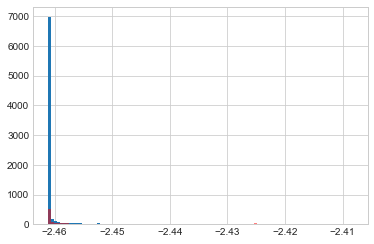

---------
accepted 3821
acceptance 0.3821
accepted correct 3118
accuracy 0.8160167495420048
branch_softmax/MatMul:0


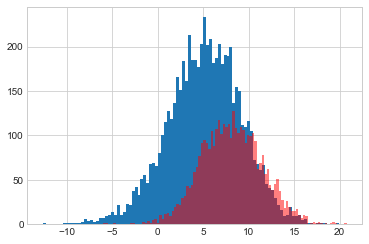

---------
accepted 4053
acceptance 0.4053
accepted correct 3630
accuracy 0.8956328645447816
branch_softmax_1/MatMul:0


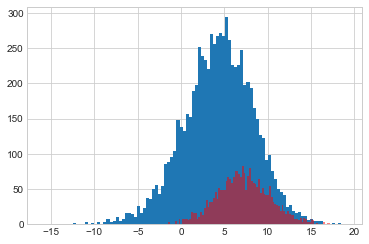

---------
accepted 3887
acceptance 0.3887
accepted correct 3850
accuracy 0.9904810908155389
branch_softmax_2/MatMul:0


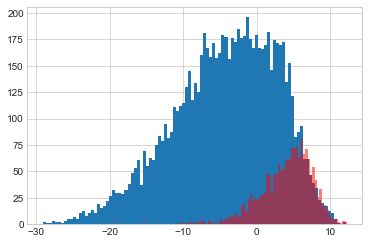

---------


In [32]:
for i, data in enumerate(outputs):
    metric = 'energy'
    Correct = data.loc[(data['correct'] == True)]
    threshold = Correct[metric].mean()
    # print(threshold)
    Incorrect = data.loc[(data['correct'] == False)]
    _ = plt.hist(Correct[metric].tolist(), bins=100)  # arguments are passed to np.histogram
    _ = plt.hist(Incorrect[metric].tolist(), bins=100,color="red",alpha=0.5)  # arguments are passed to np.histogram
    print("accepted", len(data.loc[data[metric] <= threshold]))
    print("acceptance", len(data.loc[data[metric] <= threshold])/len(data))
    print("accepted correct",len(Correct.loc[Correct[metric] <= threshold]))
    print("accuracy", len(Correct.loc[Correct[metric] <= threshold])/len(data.loc[data[metric] <= threshold]))
    print(model.outputs[i].name)
    plt.show()
    print("---------")


accepted 8003
acceptance 0.8003
accepted correct 7308
accuracy 0.9131575659127827
dense_2/Softmax:0


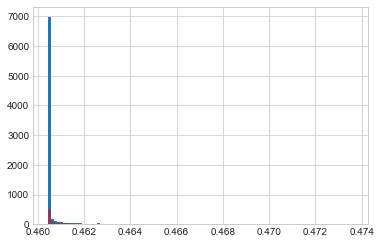

---------
accepted 852
acceptance 0.0852
accepted correct 809
accuracy 0.9495305164319249
branch_softmax/MatMul:0


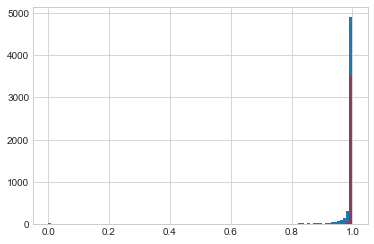

---------
accepted 1192
acceptance 0.1192
accepted correct 1168
accuracy 0.9798657718120806
branch_softmax_1/MatMul:0


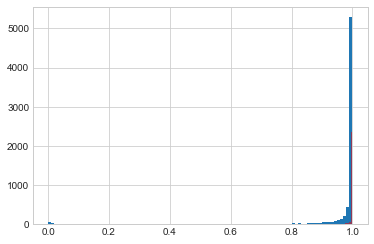

---------
accepted 4612
acceptance 0.4612
accepted correct 4534
accuracy 0.9830875975715525
branch_softmax_2/MatMul:0


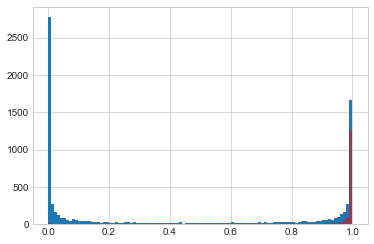

---------


In [61]:
for i, data in enumerate(outputs):
    metric = 'uncert'
    Correct = data.loc[(data['correct'] == True)]
    threshold = Correct[metric].mean()
    # print(threshold)
    Incorrect = data.loc[(data['correct'] == False)]
    _ = plt.hist(Correct[metric].tolist(), bins=100)  # arguments are passed to np.histogram
    _ = plt.hist(Incorrect[metric].tolist(), bins=100,color="red",alpha=0.5)  # arguments are passed to np.histogram
    print("accepted", len(data.loc[data[metric] <= threshold]))
    print("acceptance", len(data.loc[data[metric] <= threshold])/len(data))
    print("accepted correct",len(Correct.loc[Correct[metric] <= threshold]))
    print("accuracy", len(Correct.loc[Correct[metric] <= threshold])/len(data.loc[data[metric] <= threshold]))
    print(model.outputs[i].name)
    plt.show()
    print("---------")


rollover enabled, 5318 predictions provided
rollover enabled, 2560 predictions provided
rollover enabled, 1697 predictions provided


<Figure size 432x288 with 0 Axes>

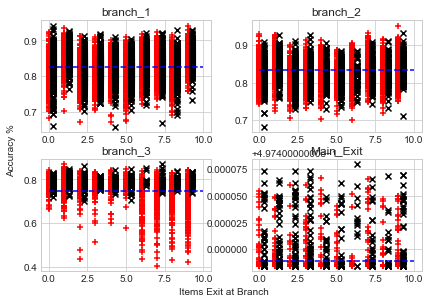

,Branch Name,Predictions,Overall_Accuracy,Accuracy,E_Threshold,acceptance_rate,accepted_correct,accepted_incorrect,accepted_accuracy,overlap_adjusted_accuracy,M(T) B(F),M(F) B(T),M(F) B(F) overlap
0,branch_1,10000,0.6357,0.635700,0.825295,0.468200,3058,1624,0.653140,0.622038,3962,0,250
1,branch_2,5318,0.7485,0.749906,0.833550,0.518616,1961,797,0.711022,0.842578,2055,0,196
2,branch_3,2560,0.8245,0.851172,0.748111,0.337109,832,31,0.964079,0.490277,837,0,0
3,Main_Exit,1697,0.8276,0.799646,0.497389,1.000000,1357,340,0.799646,3.599469,1697,0,0


In [109]:
def displayEvidence_cascade(outputs, thresholds=None, metric ='energy', output_names=["branch_1","branch_2","branch_3","Main_Exit"],Evidence=True):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure()
    series=[]
    fig, axs = plt.subplots(2, 2)
    fig.tight_layout()
    Outputs=pd.DataFrame()
    #lets reorder the predictions so that the final layer is at the end
    _outputs = outputs.copy()
    _outputs.append(_outputs.pop(0))
    rollOver_indices = pd.Index([])
    for i, Predictions in enumerate(_outputs):
        if i == len(_outputs)-1:
            #last exit, accept all
            accept_all = True
        else:
            accept_all = False
        #check if rollover is active, if so, select only the predictions whose indexes match the rollover list
        # print(rollOver_indices)
        # test_acc = Predictions["Acc"].astype('bool').value_counts()
        Predictions["Acc"]=Predictions["correct"].astype('bool')
        Predictions['evidence'] = Predictions[metric]
        # Predictions["evidence"]=Predictions["evidence"].()[0]
        overall_accuracy = (len(Predictions.loc[Predictions['correct'] == True]) /  (len(Predictions)))
        if len(rollOver_indices)>0:
            print("rollover enabled, {} predictions provided".format(len(rollOver_indices)))
            Predictions = Predictions.iloc[rollOver_indices]
        # print(Predictions.shape)
        # Predictions["Acc"]=Predictions["Acc"].astype('bool')
        # Predictions["evidence"]=Predictions["evidence"].()[0]
        Accuracy = len(Predictions.loc[Predictions['correct'] == True]) / (len(Predictions))
        # print(acc)
        # print((acc.loc[True] , acc.loc[False]))
#         _Incorrects_missed = Predictions.loc[(Predictions['Acc'] == False)  & (Predictions["overlap"] == 1)] #all the predictions that the main exit got true and the branch got wrong
#         if len(_Incorrects_missed) > 0 :
#             mean = _Incorrects_missed.groupby("Acc")["evidence"].mean().iloc[0]
#             std = _Incorrects_missed.groupby("Acc")["evidence"].std().iloc[0]
#         else:
#             mean = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].mean().iloc[0]
#             std = Predictions.loc[(Predictions['Acc'] == False)].groupby("Acc")["evidence"].std().iloc[0]

#         print("mean",mean , " std",std)
        
        correct_rows = Predictions.loc[Predictions['Acc'] == True]
        incorrect_rows = Predictions.loc[Predictions['Acc'] == False]
        
        E_threshold = -1 #-1 is null for threshold
        if thresholds is not None:
            try:
                E_threshold = thresholds[i]
            except:
                print("threshold not supplied for branch {}, using test data".format(i))
                
        # if Evidence:
        if E_threshold ==-1:
            E_threshold = correct_rows[metric].mean()
        if accept_all == True:
            Accepted = Predictions
            Rejected = None
        else:
            Accepted = Predictions.loc[(Predictions["evidence"] <= E_threshold)]
            Rejected = Predictions.loc[(Predictions["evidence"] > E_threshold)]
            rollOver_indices = Rejected.index
        # else: 
            # if E_threshold ==-1:
            #     E_threshold = mean - (std/2)
            # Accepted = Predictions.loc[(Predictions["evidence"] <= E_threshold)]
            # Rejected = Predictions.loc[(Predictions["evidence"] > E_threshold)]
        
        # rollOver_indices = Rejected.index
        Incorrects_overlap = Accepted.loc[(Accepted['Acc'] == False) & (Accepted["overlap"] == 0)].count().iloc[0]
        Outputs = Outputs.append(pd.DataFrame({"Branch Name":output_names[i],
                "Predictions": len(Predictions.index),
                "Overall_Accuracy": overall_accuracy,
                "Accuracy":Accuracy,
                "E_Threshold":E_threshold,
                # "Overlap_Threshold":non_overlapping_incorrects_threshold,
                "acceptance_rate":Accepted.shape[0]/(Predictions.shape[0]),
                "accepted_correct":Accepted.loc[(Predictions['Acc'] == True)].shape[0],
                "accepted_incorrect":Accepted.loc[(Predictions['Acc'] == False)].shape[0],
                "accepted_accuracy":(Accepted.loc[(Accepted['Acc'] == True)].shape[0])/ Accepted.shape[0],
                "overlap_adjusted_accuracy":(Accepted.loc[(Accepted['Acc'] == True)].count()[0] + Incorrects_overlap) / Predictions.loc[(Predictions["evidence"] >E_threshold)].count()[0],
                "M(T) B(F)":Accepted.loc[(Accepted["overlap"] == 1)].count().iloc[0],
                "M(F) B(T)":Accepted.loc[(Accepted["overlap"] ==-1)].count().iloc[0],
                "M(F) B(F) overlap":Incorrects_overlap,
                },index=[i]))
#         print("TT",Accepted.loc[(Accepted["Acc"] ==True) & (Accepted["overlap"] == 0)])
#         print("TF",Accepted.loc[(Accepted["overlap"] == 1)])
#         print("FT",Accepted.loc[(Accepted["overlap"] == -1)])
#         print("FF",Accepted.loc[(Accepted["Acc"] ==False) & (Accepted["overlap"] == 0)])
        axs[round(int(i/2)), round(i%2)]
    # fig, axs = plt.subplots(1, 2)
        # axs[round(int(i/2)), round(i%2)].suptitle('Horizontally stacked subplots')
        axs[round(int(i/2)), round(i%2)].scatter(correct_rows['y'],correct_rows['evidence'],c ='r',marker='+')
        axs[round(int(i/2)), round(i%2)].scatter(incorrect_rows['y']+.3,incorrect_rows['evidence'],c ='k',marker='x')
        axs[round(int(i/2)), round(i%2)].plot(np.repeat(E_threshold,11),'b--')
        axs[round(int(i/2)), round(i%2)].title.set_text(output_names[i])
    
    for ax in fig.axes:
            # ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            axLine, axLabel = ax.get_legend_handles_labels()
            lines=(axLine)
            labels=(axLabel)
    fig.text(0.5, 0.01, 'Items Exit at Branch', ha='center', va='center')
    fig.text(0.01, 0.5, 'Accuracy %', ha='center', va='center', rotation='vertical')
    # fig.legend(lines, labels,bbox_to_anchor=(1., 1), loc=2,borderaxespad=0.,frameon=True)
    # fig.set_size_inches(10, 10)
    plt.show()
    return Outputs
displayEvidence_cascade(outputs, metric = 'uncert')

rollover enabled, 5311 predictions provided
rollover enabled, 2556 predictions provided
rollover enabled, 1311 predictions provided


<Figure size 432x288 with 0 Axes>

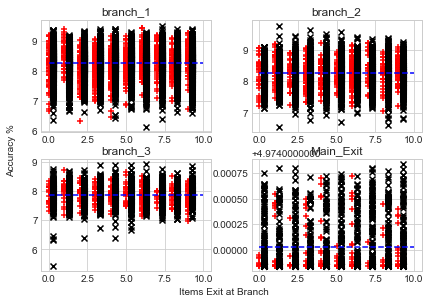

,Branch Name,Predictions,Overall_Accuracy,Accuracy,E_Threshold,acceptance_rate,accepted_correct,accepted_incorrect,accepted_accuracy,overlap_adjusted_accuracy,M(T) B(F),M(F) B(T),M(F) B(F) overlap
0,branch_1,10000,0.1030,0.103000,8.254332,0.468900,470,4219,0.100235,0.486349,2352,0,2113
1,branch_2,5311,0.1006,0.101487,8.246329,0.518735,258,2497,0.093648,0.647887,1215,0,1398
2,branch_3,2556,0.1019,0.102113,7.871628,0.487089,124,1121,0.099598,0.241037,1040,0,192
3,Main_Exit,1311,0.1002,0.095347,4.974024,1.000000,125,1186,0.095347,0.264831,1311,0,0


In [112]:

displayEvidence_cascade(outputs_OOD,  metric = 'uncert')

C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in longlong_scalars
C:\Users\Sanity\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in longlong_scalars


ZeroDivisionError: division by zero

<Figure size 432x288 with 0 Axes>

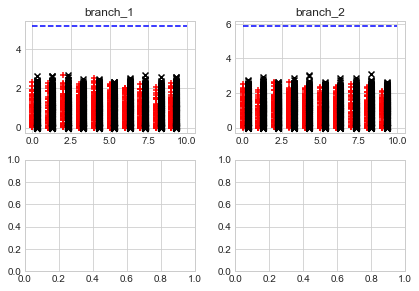

In [106]:
displayEvidence_cascade(outputs_OOD, thresholds=[5.179705,5.877087,-0.065343,-2.454486], metric = 'entropy')